# Time Series Forecasting Using NN, LSTM and CNN

# DataPreProcessing

In [2]:
import numpy as np
import pandas as pd

dataset=pd.read_csv('C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv')

In [3]:
dataset= dataset.drop(columns=['Date','Adj_Close'])

In [4]:
dataset = dataset[['Open','High','Low','Volume','Close']]
dataset.head()

,Open,High,Low,Volume,Close
0,3.812500,4.156250,3.812500,3675600,4.125000
1,4.125000,4.125000,4.000000,1077600,4.015625
2,4.000000,4.031250,3.953125,437200,4.000000
3,4.000000,4.000000,3.843750,1883600,3.843750
4,3.734375,3.734375,3.390625,7931600,3.390625


In [5]:
from scipy.stats import zscore

dataset['Open'] = zscore(dataset['Open'])
dataset['High'] = zscore(dataset['High'])
dataset['Low'] = zscore(dataset['Low'])
dataset['Volume'] = zscore(dataset['Volume'])

In [6]:
X = dataset.iloc[:,:].values
y = dataset.iloc[:,4].values

In [7]:
xtrain = dataset.iloc[0:3074,:].values
ytrain = dataset.iloc[0:3074,4].values

xtest = dataset.iloc[3074:4393,:].values
ytest = dataset.iloc[3074:4393,4].values

In [8]:
x_train=xtrain
y_train=ytrain
x_test=xtest
y_test=ytest

In [9]:
X_train =[]
Y_train = []


for i in range(7, len(x_train)):
    X_train.append(x_train[i-7:i ,:])
    Y_train.append(xtrain[i,4])

In [10]:
for i in range(7, 14):
    X_train.append(x_train[i-7:i ,:])
    Y_train.append(xtrain[i,4])

In [11]:
X_train=np.array(X_train)

In [12]:
X_train.shape

(3074, 7, 5)

In [13]:
X_test =[]
Y_test = []


for i in range(7, len(x_test)):
    X_test.append(x_test[i-7:i ,:])
    Y_test.append(xtest[i,4])

In [14]:
for i in range(7,14):
    X_test.append(x_test[i-7:i ,:])
    Y_test.append(xtest[i,4])

In [15]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [16]:
X_test.shape

(1318, 7, 5)

In [17]:
Y_test.shape

(1318,)

In [18]:
Y_train=np.array(Y_train)

In [19]:
array = X_train.reshape(3074,35)
arraytest = X_test.reshape(1318, 35)

# Fully Connected Neural Network

In [51]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [23]:
model = Sequential()
#Neural network model has 4 layers and 486 neurons
#Layer 1 has 35 nerons Layer 2 has 300 neurons Layer 3 has 150 and Layer 4 has 1 neuron.

model.add(Dense(300, input_dim = 35,activation='relu')) #hidden 1
model.add(Dense(150, activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)

W1007 23:33:52.137011 18440 deprecation.py:506] From C:\Users\Amit\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
import os
model.fit(array, Y_train,validation_data=(arraytest, Y_test),verbose=2,epochs=500,callbacks=[monitor,checkpointer])

Train on 3074 samples, validate on 1318 samples
Epoch 1/500
3074/3074 - 2s - loss: 10.3207 - acc: 0.0000e+00 - val_loss: 5.8262 - val_acc: 0.0000e+00
Epoch 2/500
3074/3074 - 1s - loss: 0.3695 - acc: 0.0000e+00 - val_loss: 5.6972 - val_acc: 0.0000e+00
Epoch 3/500
3074/3074 - 2s - loss: 0.3034 - acc: 0.0000e+00 - val_loss: 3.6519 - val_acc: 0.0000e+00
Epoch 4/500
3074/3074 - 1s - loss: 0.2782 - acc: 0.0000e+00 - val_loss: 10.3396 - val_acc: 0.0000e+00
Epoch 5/500
3074/3074 - 2s - loss: 0.2503 - acc: 0.0000e+00 - val_loss: 2.8061 - val_acc: 0.0000e+00
Epoch 6/500
3074/3074 - 1s - loss: 0.2065 - acc: 0.0000e+00 - val_loss: 4.2672 - val_acc: 0.0000e+00
Epoch 7/500
3074/3074 - 1s - loss: 0.1987 - acc: 0.0000e+00 - val_loss: 2.4663 - val_acc: 0.0000e+00
Epoch 8/500
3074/3074 - 1s - loss: 0.1798 - acc: 0.0000e+00 - val_loss: 7.9833 - val_acc: 0.0000e+00
Epoch 9/500
3074/3074 - 1s - loss: 0.2320 - acc: 0.0000e+00 - val_loss: 2.7862 - val_acc: 0.0000e+00
Epoch 10/500
3074/3074 - 1s - loss: 0.176

In [25]:
pred = model.predict(arraytest)

In [27]:
score1 = np.sqrt(metrics.mean_squared_error(pred.flatten(),Y_test))
print("Score (RMSE): {}".format(score1))

Score (RMSE): 1.9512996907865061


In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
print("Regression Lift Chart")
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

Regression Lift Chart


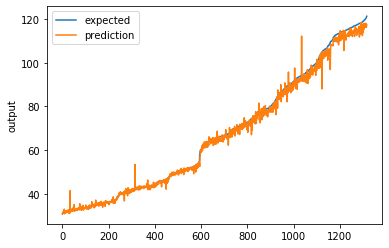

In [29]:
chart_regression(pred.flatten(),Y_test)

In [204]:
from tensorflow.keras import optimizers
model2 = Sequential()
#neural network models has 4 layers and 1836 neurons

#Layer 1 has 35 nerons Layer 2 has 1200 neurons Layer 3 has 600 and Layer 4 has 1 neuron.

model2.add(Dense(1200, input_dim = 35,activation='tanh')) #hidden 1
model2.add(Dense(600, activation='sigmoid'))
#model.add(Dense(150, activation='relu'))

model2.add(Dense(1)) 
adam=optimizers.Adam(lr=0.001 , decay=0.0 , clipvalue=0.5, clipnorm=1.)
model2.compile(loss='mean_squared_error', optimizer=adam, metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)

In [205]:
import os
model2.fit(array, Y_train,validation_data=(arraytest, Y_test),verbose=2,epochs=500,callbacks=[monitor,checkpointer])

Train on 3074 samples, validate on 1318 samples
Epoch 1/500
3074/3074 - 4s - loss: 37.1038 - acc: 0.0000e+00 - val_loss: 1587.5583 - val_acc: 0.0000e+00
Epoch 2/500
3074/3074 - 1s - loss: 1.1386 - acc: 0.0000e+00 - val_loss: 1290.0116 - val_acc: 0.0000e+00
Epoch 3/500
3074/3074 - 1s - loss: 0.6530 - acc: 0.0000e+00 - val_loss: 1176.5771 - val_acc: 0.0000e+00
Epoch 4/500
3074/3074 - 1s - loss: 1.1502 - acc: 0.0000e+00 - val_loss: 1173.0343 - val_acc: 0.0000e+00
Epoch 5/500
3074/3074 - 1s - loss: 0.8403 - acc: 0.0000e+00 - val_loss: 1192.0765 - val_acc: 0.0000e+00
Epoch 6/500
3074/3074 - 1s - loss: 0.7246 - acc: 0.0000e+00 - val_loss: 1187.2788 - val_acc: 0.0000e+00
Epoch 7/500
3074/3074 - 2s - loss: 0.6427 - acc: 0.0000e+00 - val_loss: 1208.2046 - val_acc: 0.0000e+00
Epoch 8/500
3074/3074 - 2s - loss: 0.6019 - acc: 0.0000e+00 - val_loss: 1254.9954 - val_acc: 0.0000e+00
Epoch 9/500
3074/3074 - 2s - loss: 0.3901 - acc: 0.0000e+00 - val_loss: 1235.1052 - val_acc: 0.0000e+00
Epoch 00009: ea

In [206]:
pred = model2.predict(arraytest)

In [208]:
ns = np.sqrt(metrics.mean_squared_error(pred.flatten(),Y_test))
print("Score (RMSE): {}".format(ns))

Score (RMSE): 35.144063238783275


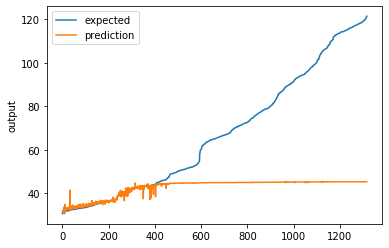

In [209]:
chart_regression(pred.flatten(),Y_test)

In [145]:
model3 = Sequential()
#neural network model has 5 layers and 836 neurons
#Layer 1 has 35 nerons Layer 2 has 500 neurons Layer 3 has 150 and Layer 4 has 150 neurons Layer 5 has 1 neuron.

model3.add(Dense(500, input_dim = 35,activation='sigmoid')) #hidden 1
model3.add(Dense(150, activation='sigmoid'))
model3.add(Dense(150, activation='relu'))
#model.add(Dense(150, activation='relu'))

model3.add(Dense(1)) 
model3.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)

In [152]:
import os
model3.fit(array, Y_train,validation_data=(arraytest, Y_test),verbose=2,epochs=500, callbacks=[monitor,checkpointer])

Train on 3074 samples, validate on 1318 samples
Epoch 1/500
3074/3074 - 1s - loss: 0.1987 - acc: 0.0000e+00 - val_loss: 1045.1965 - val_acc: 0.0000e+00
Epoch 2/500
3074/3074 - 1s - loss: 0.2445 - acc: 0.0000e+00 - val_loss: 1044.6767 - val_acc: 0.0000e+00
Epoch 3/500
3074/3074 - 1s - loss: 0.1861 - acc: 0.0000e+00 - val_loss: 1050.4284 - val_acc: 0.0000e+00
Epoch 4/500
3074/3074 - 0s - loss: 0.1903 - acc: 0.0000e+00 - val_loss: 1030.6729 - val_acc: 0.0000e+00
Epoch 5/500
3074/3074 - 1s - loss: 0.2415 - acc: 0.0000e+00 - val_loss: 1059.1319 - val_acc: 0.0000e+00
Epoch 6/500
3074/3074 - 1s - loss: 0.2025 - acc: 0.0000e+00 - val_loss: 1053.0172 - val_acc: 0.0000e+00
Epoch 7/500
3074/3074 - 0s - loss: 0.1945 - acc: 0.0000e+00 - val_loss: 1028.8986 - val_acc: 0.0000e+00
Epoch 8/500
3074/3074 - 0s - loss: 0.1966 - acc: 0.0000e+00 - val_loss: 1036.5094 - val_acc: 0.0000e+00
Epoch 9/500
3074/3074 - 0s - loss: 0.1935 - acc: 0.0000e+00 - val_loss: 1038.3445 - val_acc: 0.0000e+00
Epoch 10/500
307

In [153]:
pred = model3.predict(arraytest)

In [154]:
score3 = np.sqrt(metrics.mean_squared_error(pred.flatten(),Y_test))
print("Score (RMSE): {}".format(score3))

Score (RMSE): 32.088237903279435


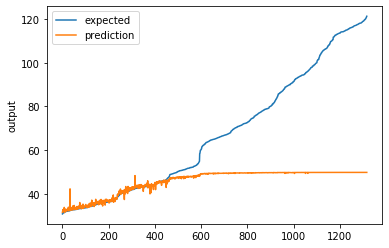

In [155]:
chart_regression(pred.flatten(),Y_test)

In [193]:

from tensorflow.keras import optimizers
#from keras.optimizers import Adam, SGD

model4 = Sequential()
#neural network model has 5 layers and 536 neurons
#Layer 1 has 35 nerons Layer 2 has 300 neurons Layer 3 has 150 and Layer 4 has 50 neurons, Layer 5 has 1 neuron.

model4.add(Dense(300, input_dim = 35,activation='relu')) #hidden 1
model4.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))

model4.add(Dense(1)) 
sgd=optimizers.SGD(lr=0.01 , decay=0.0 , clipvalue=0.5, clipnorm=1.)
model4.compile(loss='mean_squared_error', optimizer=sgd, metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)

In [194]:
import os
model4.fit(array, Y_train,validation_data=(arraytest, Y_test),verbose=2,epochs=500, callbacks=[monitor,checkpointer])

W1008 00:57:09.559646 18440 deprecation.py:323] From C:\Users\Amit\Anaconda3\lib\site-packages\tensorflow\python\ops\clip_ops.py:157: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3074 samples, validate on 1318 samples
Epoch 1/500
3074/3074 - 3s - loss: 26.1491 - acc: 0.0000e+00 - val_loss: 11.3130 - val_acc: 0.0000e+00
Epoch 2/500
3074/3074 - 1s - loss: 0.6340 - acc: 0.0000e+00 - val_loss: 6.3764 - val_acc: 0.0000e+00
Epoch 3/500
3074/3074 - 0s - loss: 0.6260 - acc: 0.0000e+00 - val_loss: 8.7738 - val_acc: 0.0000e+00
Epoch 4/500
3074/3074 - 0s - loss: 0.5739 - acc: 0.0000e+00 - val_loss: 6.3848 - val_acc: 0.0000e+00
Epoch 5/500
3074/3074 - 0s - loss: 0.6015 - acc: 0.0000e+00 - val_loss: 5.8356 - val_acc: 0.0000e+00
Epoch 6/500
3074/3074 - 1s - loss: 0.5707 - acc: 0.0000e+00 - val_loss: 3.7964 - val_acc: 0.0000e+00
Epoch 7/500
3074/3074 - 0s - loss: 0.6185 - acc: 0.0000e+00 - val_loss: 7.9802 - val_acc: 0.0000e+00
Epoch 8/500
3074/3074 - 0s - loss: 0.5291 - acc: 0.0000e+00 - val_loss: 8.4088 - val_acc: 0.0000e+00
Epoch 9/500
3074/3074 - 0s - loss: 0.5144 - acc: 0.0000e+00 - val_loss: 6.8069 - val_acc: 0.0000e+00
Epoch 10/500
3074/3074 - 0s - loss: 0.468

In [195]:
pred = model4.predict(arraytest)

In [196]:
score4 = np.sqrt(metrics.mean_squared_error(pred.flatten(),Y_test))
print("Score (RMSE): {}".format(score4))

Score (RMSE): 2.6181349602251958


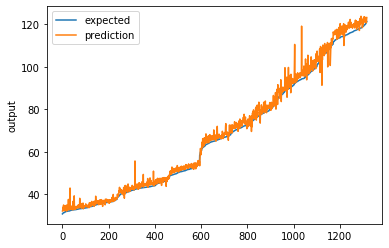

In [197]:
chart_regression(pred.flatten(),Y_test)

In [211]:
print("RMSE SCORE COMPARISON:")
print("1.Activation-Relu,Relu, Opt-Adam:             {}".format(score1))
print("2.Activation-tanh & sigmoid, Opt-adam:        {}".format(ns))
print("3.Activation-sigmoid, sigmoid, relu Opt-Adam: {}".format(score3))
print("4.Activation-relu, relu, relu Opt-sgd:        {}".format(score4))

RMSE SCORE COMPARISON:
1.Activation-Relu,Relu, Opt-Adam:             1.9512996907865061
2.Activation-tanh & sigmoid, Opt-adam:        35.144063238783275
3.Activation-sigmoid, sigmoid, relu Opt-Adam: 32.088237903279435
4.Activation-relu, relu, relu Opt-sgd:        2.6181349602251958


In [228]:
print("Best FNN Model is Activtion- Relu,Relu  Opt- Adam with 486 neurons has score:{}".format(score1) )

Best FNN Model is Activtion- Relu,Relu  Opt- Adam with 486 neurons has score:1.9512996907865061


# LSTM

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding ,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Number of LSTM Layers are 6. Layer 1 : 35 neurons Layer2: 1200 neurons Layer 3: 600 neurons 
#Layer 4 has 300 neurons Layer 5: 100 neurons Layer 6 has 1 neuron

print('Build model...')
model = Sequential()

model.add(LSTM(1200,activation='relu',dropout=0.0, recurrent_dropout=0.0, input_shape=(7, 5), kernel_initializer='random_uniform'))
model.add(Dense(600,activation ='relu'))
model.add(Dense(300))
model.add(Dense(100))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)
print('Train...')

model.fit(X_train,Y_train,validation_data=(X_test,Y_test), callbacks=[monitor],verbose=2, epochs=100)

W1008 01:27:41.133471 18440 deprecation.py:506] From C:\Users\Amit\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Build model...
Train...
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
3074/3074 - 72s - loss: 4.1049 - val_loss: 6.6803
Epoch 2/100
3074/3074 - 61s - loss: 0.4107 - val_loss: 29.1158
Epoch 3/100
3074/3074 - 60s - loss: 0.4263 - val_loss: 15.3370
Epoch 4/100
3074/3074 - 64s - loss: 0.3592 - val_loss: 5.4004
Epoch 5/100
3074/3074 - 59s - loss: 0.3081 - val_loss: 4.2233
Epoch 6/100
3074/3074 - 59s - loss: 0.3728 - val_loss: 4.4834
Epoch 7/100
3074/3074 - 63s - loss: 0.3296 - val_loss: 3.7701
Epoch 8/100
3074/3074 - 66s - loss: 0.2548 - val_loss: 6.6094
Epoch 9/100
3074/3074 - 60s - loss: 0.2765 - val_loss: 20.6365
Epoch 10/100
3074/3074 - 60s - loss: 0.3582 - val_loss: 8.4259
Epoch 11/100
3074/3074 - 61s - loss: 0.3950 - val_loss: 37.1547
Epoch 12/100
3074/3074 - 73s - loss: 0.8831 - val_loss: 12.0739
Epoch 00012: early stopping


In [213]:
pred = model.predict(X_test)

In [214]:
score5 = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Score (RMSE): {}".format(score5))

Score (RMSE): 3.4747453138266513


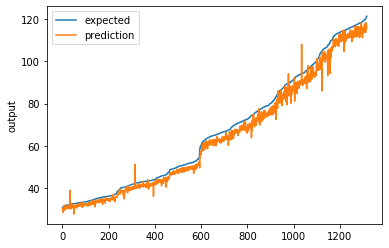

In [215]:
chart_regression(pred.flatten(),Y_test)

In [216]:
print('Build model...')
model = Sequential()


# Number of LSTM Layers are 5. Layer 1 : 35 neurons Layer2: 1200 neurons Layer 3: 600 neurons 
#Layer 4 has 300 neurons  Layer 5 has 1 neuron

model.add(LSTM(1200,activation='sigmoid',dropout=0.0, recurrent_dropout=0.0, input_shape=(7, 5), kernel_initializer='random_uniform'))
model.add(Dense(600))
model.add(Dense(300))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)
print('Train...')

model.fit(X_train,Y_train,validation_data=(X_test,Y_test), callbacks=[monitor,checkpointer],verbose=2, epochs=100)

Build model...
Train...
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
3074/3074 - 72s - loss: 17.9744 - val_loss: 698.4317
Epoch 2/100
3074/3074 - 91s - loss: 0.4082 - val_loss: 666.7389
Epoch 3/100
3074/3074 - 88s - loss: 0.3059 - val_loss: 654.3381
Epoch 4/100
3074/3074 - 88s - loss: 0.3880 - val_loss: 622.7239
Epoch 5/100
3074/3074 - 88s - loss: 0.2735 - val_loss: 626.7676
Epoch 6/100
3074/3074 - 93s - loss: 0.2963 - val_loss: 615.0250
Epoch 7/100
3074/3074 - 90s - loss: 0.4279 - val_loss: 687.0720
Epoch 8/100
3074/3074 - 60s - loss: 0.3728 - val_loss: 736.5424
Epoch 9/100
3074/3074 - 61s - loss: 0.3384 - val_loss: 687.2990
Epoch 10/100
3074/3074 - 63s - loss: 0.3329 - val_loss: 596.7052
Epoch 11/100
3074/3074 - 63s - loss: 0.3714 - val_loss: 684.6696
Epoch 12/100
3074/3074 - 68s - loss: 0.3709 - val_loss: 565.1729
Epoch 13/100
3074/3074 - 64s - loss: 0.4851 - val_loss: 644.9619
Epoch 14/100
3074/3074 - 61s - loss: 0.2303 - val_loss: 623.2906
Epoch 15/100
3074/3074 - 6

In [217]:
pred = model.predict(X_test)

In [218]:
score6 = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Score (RMSE): {}".format(score6))

Score (RMSE): 25.53513595017853


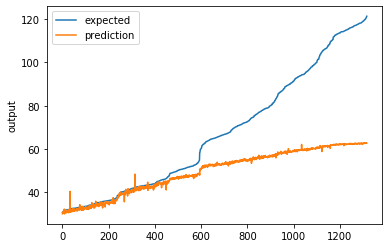

In [219]:
chart_regression(pred.flatten(),Y_test)

In [221]:
print('Build model...')
model = Sequential()

# Number of LSTM Layers are 5. Layer 1 : 35 neurons Layer2: 1200 neurons Layer 3: 600 neurons 
#Layer 4 has 300 neurons  Layer 5 has 1 neuron

model.add(LSTM(1200,activation='tanh',dropout=0.0, recurrent_dropout=0.0, input_shape=(7, 5), kernel_initializer='random_uniform'))
model.add(Dense(600))
model.add(Dense(300))
model.add(Dense(1))

sgd=optimizers.SGD(lr=0.01 , decay=0.0 , clipvalue=0.5, clipnorm=1.)
model.compile(loss='mean_squared_error', optimizer=sgd)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)
print('Train...')

model.fit(X_train,Y_train,validation_data=(X_test,Y_test), callbacks=[monitor,checkpointer],verbose=2, epochs=100)

Build model...
Train...
Train on 3074 samples, validate on 1318 samples
Epoch 1/100
3074/3074 - 74s - loss: 46.2712 - val_loss: 1321.7972
Epoch 2/100
3074/3074 - 68s - loss: 0.6849 - val_loss: 1270.3308
Epoch 3/100
3074/3074 - 61s - loss: 0.6170 - val_loss: 1316.2268
Epoch 4/100
3074/3074 - 61s - loss: 0.6031 - val_loss: 1261.3028
Epoch 5/100
3074/3074 - 62s - loss: 0.5909 - val_loss: 1294.0585
Epoch 6/100
3074/3074 - 62s - loss: 0.5817 - val_loss: 1255.3045
Epoch 7/100
3074/3074 - 63s - loss: 0.5587 - val_loss: 1228.2772
Epoch 8/100
3074/3074 - 61s - loss: 0.5232 - val_loss: 1182.4991
Epoch 9/100
3074/3074 - 59s - loss: 0.5425 - val_loss: 1171.5685
Epoch 10/100
3074/3074 - 62s - loss: 0.5057 - val_loss: 1215.3769
Epoch 11/100
3074/3074 - 61s - loss: 0.5182 - val_loss: 1163.6559
Epoch 12/100
3074/3074 - 60s - loss: 0.4930 - val_loss: 1185.4374
Epoch 13/100
3074/3074 - 65s - loss: 0.4840 - val_loss: 1120.3370
Epoch 14/100
3074/3074 - 63s - loss: 0.4460 - val_loss: 1146.3566
Epoch 15/100

In [ ]:
pred = model.predict(X_test)

In [222]:
score7 = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Score (RMSE): {}".format(score7))

Score (RMSE): 25.53513595017853


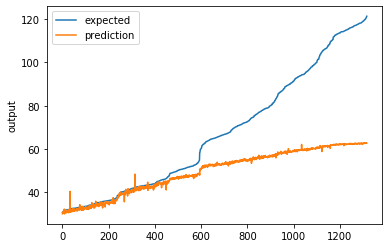

In [223]:
chart_regression(pred.flatten(),Y_test)

In [224]:
print("RMSE SCORE COMPARISON:")
print("1.Activation-Relu, Opt-Adam:                  {}".format(score5))
print("2.Activation-sigmoid, Opt-adam:               {}".format(score6))
print("3.Activation-tanh , Opt-SGD:                  {}".format(score7))


RMSE SCORE COMPARISON:
1.Activation-Relu, Opt-Adam:                  3.4747453138266513
2.Activation-sigmoid, Opt-adam:               25.53513595017853
3.Activation-tanh , Opt-SGD:                  25.53513595017853


In [226]:
print("Best LSTM Model is Activtion- Relu, Opt- Adam with 6 Layers has score:{}".format(score5) )

Best LSTM Model is Activtion- Relu, Opt- Adam with 6 Layers has score:3.4747453138266513


# CNN

In [63]:
convx_train = X_train.reshape(3074,1,7,5)
convx_test = X_test.reshape(1318,1,7,5)

In [64]:
convx_train = x_train.astype('float32')
convx_test = x_test.astype('float32')

In [65]:
convmodel = Sequential()

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [67]:
# All CNN models have 2 Kernels with size of 3x3.
convmodel.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(1,7,5)))

In [68]:
convmodel.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

In [69]:
convmodel.add(MaxPooling2D(padding = 'same',pool_size=(2, 2), strides=None))

In [70]:
convmodel.add(Flatten())

In [71]:
convmodel.add(Dense(1000, activation='relu'))

In [72]:
convmodel.add(Dense(1))

In [89]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']

convmodel.compile(loss=tf.keras.losses.mean_squared_error, optimizer=Adam(lr=0.01, decay=1e-3))

In [90]:
import os
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)

convx_train = X_train.reshape(3074,1,7,5)
convx_test = X_test.reshape(1318,1,7,5)
convmodel.fit(convx_train, Y_train,
              callbacks=[monitor,checkpointer],
          batch_size=3074,
          epochs=100,
          verbose=2,
          validation_data=(convx_test, Y_test))

Train on 3074 samples, validate on 1318 samples
Epoch 1/100
3074/3074 - 12s - loss: 271.6816 - val_loss: 2812.7444
Epoch 2/100
3074/3074 - 10s - loss: 100.3505 - val_loss: 1156.3303
Epoch 3/100
3074/3074 - 9s - loss: 99.6000 - val_loss: 2010.9075
Epoch 4/100
3074/3074 - 9s - loss: 141.0956 - val_loss: 1488.5769
Epoch 5/100
3074/3074 - 10s - loss: 95.4136 - val_loss: 251.7738
Epoch 6/100
3074/3074 - 9s - loss: 13.4611 - val_loss: 787.2221
Epoch 7/100
3074/3074 - 10s - loss: 85.9915 - val_loss: 225.7300
Epoch 8/100
3074/3074 - 10s - loss: 27.4781 - val_loss: 58.8100
Epoch 9/100
3074/3074 - 9s - loss: 3.4935 - val_loss: 398.0479
Epoch 10/100
3074/3074 - 9s - loss: 23.3764 - val_loss: 482.5190
Epoch 11/100
3074/3074 - 10s - loss: 29.7128 - val_loss: 265.0686
Epoch 12/100
3074/3074 - 11s - loss: 16.9945 - val_loss: 19.8101
Epoch 13/100
3074/3074 - 10s - loss: 1.8315 - val_loss: 138.6413
Epoch 14/100
3074/3074 - 10s - loss: 8.1503 - val_loss: 338.5275
Epoch 15/100
3074/3074 - 9s - loss: 19.1

In [91]:
pred = convmodel.predict(convx_test)

In [92]:
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 8.809782017243323


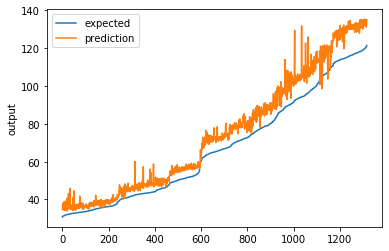

In [93]:
chart_regression(pred.flatten(),Y_test)

In [94]:
convmodel = Sequential()
convmodel.add(Conv2D(800, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(1,7,5)))
convmodel.add(Conv2D(400, (3, 3), activation='relu', padding='same'))
convmodel.add(MaxPooling2D(padding = 'same',pool_size=(2, 2), strides=None))
convmodel.add(Flatten())
convmodel.add(Dense(500, activation='relu'))
convmodel.add(Dense(1))


import tensorflow as tf
from tensorflow.keras.optimizers import SGD

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']

convmodel.compile(loss=tf.keras.losses.mean_squared_error, optimizer=SGD(lr=0.01, decay=1e-3, clipvalue=0.5, clipnorm=1.))


import os
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)

convx_train = X_train.reshape(3074,1,7,5)
convx_test = X_test.reshape(1318,1,7,5)
convmodel.fit(convx_train, Y_train,
              callbacks=[monitor,checkpointer],
          batch_size=3074,
          epochs=100,
          verbose=2,
          validation_data=(convx_test, Y_test))


Train on 3074 samples, validate on 1318 samples
Epoch 1/100
3074/3074 - 12s - loss: 331.7211 - val_loss: 4960.7051
Epoch 2/100
3074/3074 - 11s - loss: 318.1853 - val_loss: 4768.5034
Epoch 3/100
3074/3074 - 852s - loss: 305.4631 - val_loss: 4591.3809
Epoch 4/100
3074/3074 - 14s - loss: 293.6909 - val_loss: 4412.3950
Epoch 5/100
3074/3074 - 11s - loss: 281.9315 - val_loss: 4236.8369
Epoch 6/100
3074/3074 - 12s - loss: 270.2711 - val_loss: 4059.1646
Epoch 7/100
3074/3074 - 13s - loss: 258.4415 - val_loss: 3876.6650
Epoch 8/100
3074/3074 - 10s - loss: 246.2597 - val_loss: 3687.0630
Epoch 9/100
3074/3074 - 10s - loss: 233.7069 - val_loss: 3492.7644
Epoch 10/100
3074/3074 - 11s - loss: 220.8506 - val_loss: 3294.0259
Epoch 11/100
3074/3074 - 11s - loss: 207.7758 - val_loss: 3091.0620
Epoch 12/100
3074/3074 - 11s - loss: 194.4325 - val_loss: 2883.4802
Epoch 13/100
3074/3074 - 10s - loss: 180.7899 - val_loss: 2672.6348
Epoch 14/100
3074/3074 - 10s - loss: 166.9307 - val_loss: 2458.2021
Epoch 15

In [95]:
pred = convmodel.predict(convx_test)

In [96]:
cscore = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Score (RMSE): {}".format(cscore))

Score (RMSE): 4.886615217844237


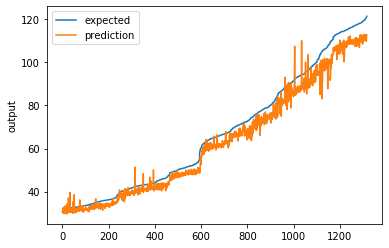

In [97]:
chart_regression(pred.flatten(),Y_test)

In [98]:
convmodel = Sequential()
convmodel.add(Conv2D(800, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='tanh',
                 input_shape=(1,7,5)))
convmodel.add(Conv2D(400, (3, 3), activation='sigmoid', padding='same'))
convmodel.add(MaxPooling2D(padding = 'same',pool_size=(2, 2), strides=None))
convmodel.add(Flatten())
convmodel.add(Dense(500, activation='relu'))
convmodel.add(Dense(1))


import tensorflow as tf
from tensorflow.keras.optimizers import SGD

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']

convmodel.compile(loss=tf.keras.losses.mean_squared_error, optimizer=SGD(lr=0.01, decay=1e-3, clipvalue=0.5, clipnorm=1.))


import os
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)

convx_train = X_train.reshape(3074,1,7,5)
convx_test = X_test.reshape(1318,1,7,5)
convmodel.fit(convx_train, Y_train,
              callbacks=[monitor,checkpointer],
          batch_size=3074,
          epochs=100,
          verbose=2,
          validation_data=(convx_test, Y_test))


Train on 3074 samples, validate on 1318 samples
Epoch 1/100
3074/3074 - 18s - loss: 345.1819 - val_loss: 5259.9194
Epoch 2/100
3074/3074 - 13s - loss: 333.3496 - val_loss: 5196.5513
Epoch 3/100
3074/3074 - 13s - loss: 321.8751 - val_loss: 5135.3379
Epoch 4/100
3074/3074 - 13s - loss: 310.8308 - val_loss: 5076.5596
Epoch 5/100
3074/3074 - 12s - loss: 300.2607 - val_loss: 5018.2622
Epoch 6/100
3074/3074 - 14s - loss: 290.0738 - val_loss: 4960.1045
Epoch 7/100
3074/3074 - 12s - loss: 280.1814 - val_loss: 4902.3667
Epoch 8/100
3074/3074 - 12s - loss: 270.5261 - val_loss: 4845.2188
Epoch 9/100
3074/3074 - 12s - loss: 261.0930 - val_loss: 4788.8203
Epoch 10/100
3074/3074 - 12s - loss: 251.8933 - val_loss: 4733.3530
Epoch 11/100
3074/3074 - 12s - loss: 242.9421 - val_loss: 4678.4985
Epoch 12/100
3074/3074 - 13s - loss: 234.2353 - val_loss: 4623.5020
Epoch 13/100
3074/3074 - 14s - loss: 225.7519 - val_loss: 4569.0083
Epoch 14/100
3074/3074 - 14s - loss: 217.4799 - val_loss: 4514.7954
Epoch 15/

In [99]:
pred = convmodel.predict(convx_test)

In [100]:
cscore1 = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Score (RMSE): {}".format(cscore1))

Score (RMSE): 44.9155521449522


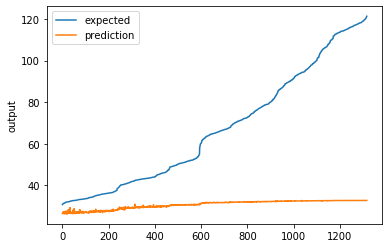

In [101]:
chart_regression(pred.flatten(),Y_test)

In [102]:
print("RMSE SCORE COMPARISON:")
print("1.Activation-Relu, Relu, Relu Opt-Adam:                 {}".format(score))
print("2.Activation-Relu,Relu,Relu Opt-SGD:                    {}".format(cscore))
print("3.Activation-tanh,Sigmoid, Relu  Opt-SGD:               {}".format(cscore1))

RMSE SCORE COMPARISON:
1.Activation-Relu, Relu, Relu Opt-Adam:                 8.809782017243323
2.Activation-Relu,Relu,Relu Opt-SGD:                    4.886615217844237
3.Activation-tanh,Sigmoid, Relu  Opt-SGD:               44.9155521449522


In [103]:
print("Best model has Activation-Relu,Relu,Relu Opt-SGD with score of              {}".format(cscore))

Best model has Activation-Relu,Relu,Relu Opt-SGD with score of              4.886615217844237


# Beyond Project

# Reducing number of days to 4 gave better results on LSTM

In [104]:
NX_train =[]
NY_train = []


for i in range(4, len(x_train)):
    NX_train.append(x_train[i-4:i ,:])
    NY_train.append(xtrain[i,4])

In [105]:
for i in range(4, 8):
    NX_train.append(x_train[i-4:i ,:])
    NY_train.append(xtrain[i,4])

In [106]:
NX_train=np.array(NX_train)

In [107]:
NX_train.shape

(3074, 4, 5)

In [108]:
NX_test =[]
NY_test = []


for i in range(4, len(x_test)):
    NX_test.append(x_test[i-4:i ,:])
    NY_test.append(xtest[i,4])

In [109]:
for i in range(4, 8):
    NX_test.append(x_test[i-4:i ,:])
    NY_test.append(xtest[i,4])

In [110]:
NY_train=np.array(NY_train)
NX_test=np.array(NX_test)
NY_test=np.array(NY_test)

In [111]:
NY_train.shape

(3074,)

In [112]:
NX_test.shape


(1318, 4, 5)

In [113]:
NY_test.shape

(1318,)

In [114]:
Narray = NX_train.reshape(3074,20)
Narraytest = NX_test.reshape(1318, 20)

In [21]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
model = Sequential()
#All 4 neural network models have 4 layers and 21 neurons
#activations using Relu, and sigmoid and optimizer is Adam

model.add(Dense(700, input_dim = 20,activation='relu')) #hidden 1
model.add(Dense(350, activation='relu'))
#model.add(Dense(125, activation='sigmoid'))
#model.add(Dense(10, activation='relu')) 
#model.add(Dense(10, activation='relu')) 
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)

In [25]:
import os
model.fit(Narray, NY_train,validation_data=(Narraytest, NY_test),verbose=2,epochs=500)

Train on 3074 samples, validate on 1318 samples
Epoch 1/500
3074/3074 - 1s - loss: 9.5129 - acc: 0.0000e+00 - val_loss: 3.1862 - val_acc: 0.0000e+00
Epoch 2/500
3074/3074 - 0s - loss: 0.2328 - acc: 0.0000e+00 - val_loss: 2.8790 - val_acc: 0.0000e+00
Epoch 3/500
3074/3074 - 0s - loss: 0.2176 - acc: 0.0000e+00 - val_loss: 3.9600 - val_acc: 0.0000e+00
Epoch 4/500
3074/3074 - 0s - loss: 0.2038 - acc: 0.0000e+00 - val_loss: 12.0067 - val_acc: 0.0000e+00
Epoch 5/500
3074/3074 - 0s - loss: 0.2245 - acc: 0.0000e+00 - val_loss: 2.3066 - val_acc: 0.0000e+00
Epoch 6/500
3074/3074 - 0s - loss: 0.1918 - acc: 0.0000e+00 - val_loss: 3.8533 - val_acc: 0.0000e+00
Epoch 7/500
3074/3074 - 1s - loss: 0.1941 - acc: 0.0000e+00 - val_loss: 2.3401 - val_acc: 0.0000e+00
Epoch 8/500
3074/3074 - 0s - loss: 0.2244 - acc: 0.0000e+00 - val_loss: 4.7712 - val_acc: 0.0000e+00
Epoch 9/500
3074/3074 - 0s - loss: 0.2116 - acc: 0.0000e+00 - val_loss: 2.2400 - val_acc: 0.0000e+00
Epoch 10/500
3074/3074 - 0s - loss: 0.2199

Epoch 81/500
3074/3074 - 0s - loss: 0.1734 - acc: 0.0000e+00 - val_loss: 3.0747 - val_acc: 0.0000e+00
Epoch 82/500
3074/3074 - 0s - loss: 0.2614 - acc: 0.0000e+00 - val_loss: 9.6743 - val_acc: 0.0000e+00
Epoch 83/500
3074/3074 - 0s - loss: 0.2558 - acc: 0.0000e+00 - val_loss: 4.4938 - val_acc: 0.0000e+00
Epoch 84/500
3074/3074 - 0s - loss: 0.2031 - acc: 0.0000e+00 - val_loss: 6.3785 - val_acc: 0.0000e+00
Epoch 85/500
3074/3074 - 0s - loss: 0.1765 - acc: 0.0000e+00 - val_loss: 3.1985 - val_acc: 0.0000e+00
Epoch 86/500
3074/3074 - 1s - loss: 0.1823 - acc: 0.0000e+00 - val_loss: 37.5739 - val_acc: 0.0000e+00
Epoch 87/500
3074/3074 - 1s - loss: 0.2468 - acc: 0.0000e+00 - val_loss: 5.7563 - val_acc: 0.0000e+00
Epoch 88/500
3074/3074 - 0s - loss: 0.2303 - acc: 0.0000e+00 - val_loss: 2.2928 - val_acc: 0.0000e+00
Epoch 89/500
3074/3074 - 0s - loss: 0.1762 - acc: 0.0000e+00 - val_loss: 2.6483 - val_acc: 0.0000e+00
Epoch 90/500
3074/3074 - 0s - loss: 0.1589 - acc: 0.0000e+00 - val_loss: 2.9427 -

Epoch 161/500
3074/3074 - 1s - loss: 0.1609 - acc: 0.0000e+00 - val_loss: 3.4530 - val_acc: 0.0000e+00
Epoch 162/500
3074/3074 - 1s - loss: 0.1778 - acc: 0.0000e+00 - val_loss: 3.4207 - val_acc: 0.0000e+00
Epoch 163/500
3074/3074 - 0s - loss: 0.1858 - acc: 0.0000e+00 - val_loss: 4.8443 - val_acc: 0.0000e+00
Epoch 164/500
3074/3074 - 0s - loss: 0.1673 - acc: 0.0000e+00 - val_loss: 2.1791 - val_acc: 0.0000e+00
Epoch 165/500
3074/3074 - 0s - loss: 0.1476 - acc: 0.0000e+00 - val_loss: 3.1841 - val_acc: 0.0000e+00
Epoch 166/500
3074/3074 - 0s - loss: 0.1720 - acc: 0.0000e+00 - val_loss: 5.2604 - val_acc: 0.0000e+00
Epoch 167/500
3074/3074 - 0s - loss: 0.1805 - acc: 0.0000e+00 - val_loss: 2.4023 - val_acc: 0.0000e+00
Epoch 168/500
3074/3074 - 0s - loss: 0.1792 - acc: 0.0000e+00 - val_loss: 2.4057 - val_acc: 0.0000e+00
Epoch 169/500
3074/3074 - 0s - loss: 0.1830 - acc: 0.0000e+00 - val_loss: 2.4813 - val_acc: 0.0000e+00
Epoch 170/500
3074/3074 - 0s - loss: 0.1525 - acc: 0.0000e+00 - val_loss:

Epoch 241/500
3074/3074 - 0s - loss: 0.1532 - acc: 0.0000e+00 - val_loss: 3.5232 - val_acc: 0.0000e+00
Epoch 242/500
3074/3074 - 0s - loss: 0.1835 - acc: 0.0000e+00 - val_loss: 4.9471 - val_acc: 0.0000e+00
Epoch 243/500
3074/3074 - 0s - loss: 0.1866 - acc: 0.0000e+00 - val_loss: 3.2059 - val_acc: 0.0000e+00
Epoch 244/500
3074/3074 - 0s - loss: 0.2051 - acc: 0.0000e+00 - val_loss: 4.5575 - val_acc: 0.0000e+00
Epoch 245/500
3074/3074 - 0s - loss: 0.1809 - acc: 0.0000e+00 - val_loss: 3.7847 - val_acc: 0.0000e+00
Epoch 246/500
3074/3074 - 0s - loss: 0.1536 - acc: 0.0000e+00 - val_loss: 2.7753 - val_acc: 0.0000e+00
Epoch 247/500
3074/3074 - 0s - loss: 0.1468 - acc: 0.0000e+00 - val_loss: 6.4683 - val_acc: 0.0000e+00
Epoch 248/500
3074/3074 - 0s - loss: 0.1490 - acc: 0.0000e+00 - val_loss: 2.6301 - val_acc: 0.0000e+00
Epoch 249/500
3074/3074 - 0s - loss: 0.1484 - acc: 0.0000e+00 - val_loss: 23.9850 - val_acc: 0.0000e+00
Epoch 250/500
3074/3074 - 0s - loss: 0.2607 - acc: 0.0000e+00 - val_loss

Epoch 321/500
3074/3074 - 0s - loss: 0.1863 - acc: 0.0000e+00 - val_loss: 7.8394 - val_acc: 0.0000e+00
Epoch 322/500
3074/3074 - 0s - loss: 0.1566 - acc: 0.0000e+00 - val_loss: 11.2667 - val_acc: 0.0000e+00
Epoch 323/500
3074/3074 - 0s - loss: 0.1442 - acc: 0.0000e+00 - val_loss: 7.6236 - val_acc: 0.0000e+00
Epoch 324/500
3074/3074 - 1s - loss: 0.1373 - acc: 0.0000e+00 - val_loss: 4.9362 - val_acc: 0.0000e+00
Epoch 325/500
3074/3074 - 1s - loss: 0.1688 - acc: 0.0000e+00 - val_loss: 5.7744 - val_acc: 0.0000e+00
Epoch 326/500
3074/3074 - 0s - loss: 0.1455 - acc: 0.0000e+00 - val_loss: 6.2802 - val_acc: 0.0000e+00
Epoch 327/500
3074/3074 - 0s - loss: 0.1554 - acc: 0.0000e+00 - val_loss: 3.4106 - val_acc: 0.0000e+00
Epoch 328/500
3074/3074 - 0s - loss: 0.1642 - acc: 0.0000e+00 - val_loss: 2.4539 - val_acc: 0.0000e+00
Epoch 329/500
3074/3074 - 0s - loss: 0.2203 - acc: 0.0000e+00 - val_loss: 11.7503 - val_acc: 0.0000e+00
Epoch 330/500
3074/3074 - 0s - loss: 0.1864 - acc: 0.0000e+00 - val_los

Epoch 401/500
3074/3074 - 0s - loss: 0.1448 - acc: 0.0000e+00 - val_loss: 11.1647 - val_acc: 0.0000e+00
Epoch 402/500
3074/3074 - 0s - loss: 0.1564 - acc: 0.0000e+00 - val_loss: 2.5987 - val_acc: 0.0000e+00
Epoch 403/500
3074/3074 - 0s - loss: 0.1995 - acc: 0.0000e+00 - val_loss: 2.4764 - val_acc: 0.0000e+00
Epoch 404/500
3074/3074 - 0s - loss: 0.1462 - acc: 0.0000e+00 - val_loss: 6.1470 - val_acc: 0.0000e+00
Epoch 405/500
3074/3074 - 0s - loss: 0.1400 - acc: 0.0000e+00 - val_loss: 2.8144 - val_acc: 0.0000e+00
Epoch 406/500
3074/3074 - 0s - loss: 0.1575 - acc: 0.0000e+00 - val_loss: 4.7825 - val_acc: 0.0000e+00
Epoch 407/500
3074/3074 - 0s - loss: 0.1568 - acc: 0.0000e+00 - val_loss: 7.9926 - val_acc: 0.0000e+00
Epoch 408/500
3074/3074 - 0s - loss: 0.1493 - acc: 0.0000e+00 - val_loss: 12.0149 - val_acc: 0.0000e+00
Epoch 409/500
3074/3074 - 0s - loss: 0.2124 - acc: 0.0000e+00 - val_loss: 7.6850 - val_acc: 0.0000e+00
Epoch 410/500
3074/3074 - 0s - loss: 0.1501 - acc: 0.0000e+00 - val_los

Epoch 481/500
3074/3074 - 0s - loss: 0.1579 - acc: 0.0000e+00 - val_loss: 4.5985 - val_acc: 0.0000e+00
Epoch 482/500
3074/3074 - 0s - loss: 0.1335 - acc: 0.0000e+00 - val_loss: 16.2472 - val_acc: 0.0000e+00
Epoch 483/500
3074/3074 - 0s - loss: 0.1462 - acc: 0.0000e+00 - val_loss: 10.9288 - val_acc: 0.0000e+00
Epoch 484/500
3074/3074 - 0s - loss: 0.1434 - acc: 0.0000e+00 - val_loss: 6.6407 - val_acc: 0.0000e+00
Epoch 485/500
3074/3074 - 0s - loss: 0.1643 - acc: 0.0000e+00 - val_loss: 4.4785 - val_acc: 0.0000e+00
Epoch 486/500
3074/3074 - 0s - loss: 0.1841 - acc: 0.0000e+00 - val_loss: 11.9360 - val_acc: 0.0000e+00
Epoch 487/500
3074/3074 - 0s - loss: 0.1618 - acc: 0.0000e+00 - val_loss: 5.6849 - val_acc: 0.0000e+00
Epoch 488/500
3074/3074 - 0s - loss: 0.1337 - acc: 0.0000e+00 - val_loss: 10.5566 - val_acc: 0.0000e+00
Epoch 489/500
3074/3074 - 0s - loss: 0.1388 - acc: 0.0000e+00 - val_loss: 9.2109 - val_acc: 0.0000e+00
Epoch 490/500
3074/3074 - 0s - loss: 0.1825 - acc: 0.0000e+00 - val_l

In [27]:
pred = model.predict(Narraytest)

In [28]:
score = np.sqrt(metrics.mean_squared_error(pred,NY_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 2.9898605308666464


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding ,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model = Sequential()

model.add(LSTM(1200,activation='relu',dropout=0.0, recurrent_dropout=0.0, input_shape=(4, 5), kernel_initializer='random_uniform'))
model.add(Dense(600))
model.add(Dense(300))
model.add(Dense(100))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)
print('Train...')

model.fit(NX_train,NY_train,validation_data=(NX_test,NY_test), callbacks=[monitor,checkpointer],verbose=2, epochs=100)

W1007 00:30:53.822524 11012 deprecation.py:506] From C:\Users\Amit\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Build model...
Train...
Train on 3074 samples, validate on 1318 samples


W1007 00:30:54.765775 11012 deprecation.py:323] From C:\Users\Amit\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
3074/3074 - 47s - loss: 30.7490 - val_loss: 5.3561
Epoch 2/100
3074/3074 - 40s - loss: 0.2018 - val_loss: 4.1272
Epoch 3/100
3074/3074 - 35s - loss: 0.2033 - val_loss: 5.2098
Epoch 4/100
3074/3074 - 38s - loss: 0.2539 - val_loss: 3.3478
Epoch 5/100
3074/3074 - 36s - loss: 0.2015 - val_loss: 9.9042
Epoch 6/100
3074/3074 - 42s - loss: 0.2375 - val_loss: 3.2647
Epoch 7/100
3074/3074 - 36s - loss: 0.2186 - val_loss: 2.6322
Epoch 8/100
3074/3074 - 37s - loss: 0.2075 - val_loss: 2.7790
Epoch 9/100
3074/3074 - 37s - loss: 0.2371 - val_loss: 3.3070
Epoch 10/100
3074/3074 - 37s - loss: 0.2357 - val_loss: 3.0248
Epoch 11/100
3074/3074 - 37s - loss: 0.3317 - val_loss: 5.6532
Epoch 12/100
3074/3074 - 36s - loss: 0.2222 - val_loss: 6.8189
Epoch 00012: early stopping


In [30]:
pred = model.predict(NX_test)

In [31]:
score = np.sqrt(metrics.mean_squared_error(pred,NY_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 2.611308094327078


In [130]:
Nconvx_train = NX_train.reshape(3074,1,4,5)
Nconvx_test = NX_test.reshape(1318,1,4,5)
Nconvx_train = x_train.astype('float32')
Nconvx_test = x_test.astype('float32')

In [131]:
convmodel = Sequential()

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [133]:
convmodel.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(1,4,5)))

In [134]:
convmodel.add(Conv2D(256, (3, 3),padding='same', activation='relu'))

In [135]:
convmodel.add(MaxPooling2D(padding = 'same',pool_size=(2, 2), strides=None))

In [136]:
convmodel.add(Flatten())

In [137]:
convmodel.add(Dense(1000, activation='relu'))

In [138]:
convmodel.add(Dense(1))

In [139]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']

convmodel.compile(loss=tf.keras.losses.mean_squared_error, optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])

In [140]:
import os
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//CSC215_P2_Stock_Price.csv", verbose=0, save_best_only=True)

Nconvx_train = NX_train.reshape(3074,1,4,5)
Nconvx_test = NX_test.reshape(1318,1,4,5)
convmodel.fit(Nconvx_train, NY_train,
              callbacks=[monitor,checkpointer],
          batch_size=3074,
          epochs=100,
          verbose=2,
          validation_data=(Nconvx_test, NY_test))

Train on 3074 samples, validate on 1318 samples
Epoch 1/100
3074/3074 - 5s - loss: 337.8205 - acc: 0.0000e+00 - val_loss: 3260.7046 - val_acc: 0.0000e+00
Epoch 2/100
3074/3074 - 3s - loss: 208.4635 - acc: 0.0000e+00 - val_loss: 1159.3489 - val_acc: 0.0000e+00
Epoch 3/100
3074/3074 - 4s - loss: 72.6698 - acc: 0.0000e+00 - val_loss: 15.7681 - val_acc: 0.0000e+00
Epoch 4/100
3074/3074 - 3s - loss: 1.8700 - acc: 0.0000e+00 - val_loss: 1410.0768 - val_acc: 0.0000e+00
Epoch 5/100
3074/3074 - 3s - loss: 100.6318 - acc: 0.0000e+00 - val_loss: 767.4310 - val_acc: 0.0000e+00
Epoch 6/100
3074/3074 - 3s - loss: 54.7972 - acc: 0.0000e+00 - val_loss: 65.5347 - val_acc: 0.0000e+00
Epoch 7/100
3074/3074 - 4s - loss: 5.1987 - acc: 0.0000e+00 - val_loss: 87.4802 - val_acc: 0.0000e+00
Epoch 8/100
3074/3074 - 3s - loss: 5.2033 - acc: 0.0000e+00 - val_loss: 381.6139 - val_acc: 0.0000e+00
Epoch 00008: early stopping


In [143]:
pred = convmodel.predict(Nconvx_test)
score = np.sqrt(metrics.mean_squared_error(pred.flatten(),NY_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 19.534939666376943


# Predicting Google's Stock Price

# Fully connected NN was our best model for predicting google's stock price

In [146]:
dataset=pd.read_csv('C://Users//Amit//Desktop//GOOG.csv')

In [147]:
dataset= dataset.drop(columns=['Date','Adj Close'])

In [148]:
dataset = dataset[['Open','High','Low','Volume','Close']]
dataset.head()

,Open,High,Low,Volume,Close
0,49.676899,51.693783,47.669952,44994500,49.845802
1,50.178635,54.187561,49.925285,23005800,53.805050
2,55.017166,56.373344,54.172661,18393200,54.346527
3,55.260582,55.439419,51.450363,15361800,52.096165
4,52.140873,53.651051,51.604362,9257400,52.657513


In [149]:
from scipy.stats import zscore

dataset['Open'] = zscore(dataset['Open'])
dataset['High'] = zscore(dataset['High'])
dataset['Low'] = zscore(dataset['Low'])
dataset['Volume'] = zscore(dataset['Volume'])

In [150]:
dataset.shape

(3578, 5)

In [151]:
xtrain = dataset.iloc[0:2504,:].values
ytrain = dataset.iloc[0:2504,4].values

xtest = dataset.iloc[2504:3578,:].values
ytest = dataset.iloc[2504:3578,4].values

In [152]:
x_train=xtrain
y_train=ytrain
x_test=xtest
y_test=ytest

In [153]:
X_train =[]
Y_train = []


for i in range(4, len(x_train)):
    X_train.append(x_train[i-4:i ,:])
    Y_train.append(xtrain[i,4])

In [154]:
for i in range(4, 8):
    X_train.append(x_train[i-4:i ,:])
    Y_train.append(xtrain[i,4])

In [155]:
X_train=np.array(X_train)

In [156]:
X_train.shape

(2504, 4, 5)

In [157]:
X_test =[]
Y_test = []


for i in range(4, len(x_test)):
    X_test.append(x_test[i-4:i ,:])
    Y_test.append(xtest[i,4])

In [158]:
for i in range(4, 8):
    X_test.append(x_test[i-4:i ,:])
    Y_test.append(xtest[i,4])

In [159]:
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [160]:
X_train.shape

(2504, 4, 5)

In [161]:
X_test.shape

(1074, 4, 5)

In [162]:
Narray = X_train.reshape(2504,20)
Narraytest = X_test.reshape(1074, 20)

In [67]:
model = Sequential()
#All 4 neural network models have 4 layers and 21 neurons
#activations using Relu, and sigmoid and optimizer is Adam

model.add(Dense(700, input_dim = 20,activation='relu')) #hidden 1
model.add(Dense(350, activation='relu'))
#model.add(Dense(125, activation='sigmoid'))
#model.add(Dense(10, activation='relu')) 
#model.add(Dense(10, activation='relu')) 
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//GOOG.csv", verbose=0, save_best_only=True)

In [69]:
import os
model.fit(Narray, Y_train,validation_data=(Narraytest, Y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=500)

Train on 2504 samples, validate on 1074 samples
Epoch 1/500
2504/2504 - 1s - loss: 37.8067 - acc: 0.0000e+00 - val_loss: 375.2976 - val_acc: 0.0000e+00
Epoch 2/500
2504/2504 - 1s - loss: 40.6014 - acc: 0.0000e+00 - val_loss: 154.3705 - val_acc: 0.0000e+00
Epoch 3/500
2504/2504 - 0s - loss: 31.6127 - acc: 0.0000e+00 - val_loss: 161.2365 - val_acc: 0.0000e+00
Epoch 4/500
2504/2504 - 0s - loss: 33.6263 - acc: 0.0000e+00 - val_loss: 173.4554 - val_acc: 0.0000e+00
Epoch 5/500
2504/2504 - 1s - loss: 31.4649 - acc: 0.0000e+00 - val_loss: 166.0404 - val_acc: 0.0000e+00
Epoch 6/500
2504/2504 - 0s - loss: 38.6047 - acc: 0.0000e+00 - val_loss: 332.0395 - val_acc: 0.0000e+00
Epoch 7/500
2504/2504 - 0s - loss: 31.1858 - acc: 0.0000e+00 - val_loss: 183.0960 - val_acc: 0.0000e+00
Epoch 00007: early stopping


In [70]:
pred = model.predict(Narraytest)
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 13.53129695379117


In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding ,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model = Sequential()

model.add(LSTM(1200,activation='relu',dropout=0.0, recurrent_dropout=0.0, input_shape=(4, 5), kernel_initializer='random_uniform'))
model.add(Dense(600))
model.add(Dense(300))
model.add(Dense(100))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-12, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//GOOG.csv", verbose=0, save_best_only=True)
print('Train...')

model.fit(X_train,Y_train,validation_data=(X_test,Y_test), callbacks=[monitor,checkpointer],verbose=2, epochs=100)

Build model...
Train...
Train on 2504 samples, validate on 1074 samples
Epoch 1/100
2504/2504 - 41s - loss: 5979.8760 - val_loss: 247.4424
Epoch 2/100
2504/2504 - 30s - loss: 44.9593 - val_loss: 378.2571
Epoch 3/100
2504/2504 - 30s - loss: 44.0271 - val_loss: 277.2493
Epoch 4/100
2504/2504 - 30s - loss: 45.0631 - val_loss: 255.6689
Epoch 5/100
2504/2504 - 30s - loss: 42.6309 - val_loss: 283.8240
Epoch 6/100
2504/2504 - 30s - loss: 44.7368 - val_loss: 226.0398
Epoch 7/100
2504/2504 - 31s - loss: 41.6323 - val_loss: 234.5867
Epoch 8/100
2504/2504 - 30s - loss: 51.3994 - val_loss: 349.5501
Epoch 9/100
2504/2504 - 29s - loss: 54.5963 - val_loss: 227.3811
Epoch 10/100
2504/2504 - 29s - loss: 48.2375 - val_loss: 223.7715
Epoch 11/100
2504/2504 - 30s - loss: 48.0421 - val_loss: 292.8144
Epoch 12/100
2504/2504 - 30s - loss: 39.0244 - val_loss: 209.4456
Epoch 13/100
2504/2504 - 29s - loss: 41.6093 - val_loss: 212.0887
Epoch 14/100
2504/2504 - 29s - loss: 44.3110 - val_loss: 396.1469
Epoch 15/10

In [125]:
pred = model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 18.93206941322686


In [163]:
Nconvx_train = X_train.reshape(2504,1,4,5)
Nconvx_test = X_test.reshape(1074,1,4,5)
Nconvx_train = x_train.astype('float32')
Nconvx_test = x_test.astype('float32')

In [174]:
convmodel = Sequential()

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [176]:
convmodel.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(1,4,5)))

In [177]:
convmodel.add(Conv2D(256, (3, 3),padding='same', activation='relu'))

In [178]:
convmodel.add(MaxPooling2D(padding = 'same',pool_size=(2, 2), strides=None))

In [179]:
convmodel.add(Flatten())

In [180]:
convmodel.add(Dense(1000, activation='relu'))

In [181]:
convmodel.add(Dense(1))

In [184]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']

convmodel.compile(loss=tf.keras.losses.mean_squared_error, optimizer=Adam(lr=0.001, decay=1e-12))

In [185]:
import os
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="C://Users//Amit//Desktop//GOOG.csv", verbose=0, save_best_only=True)

Nconvx_train = X_train.reshape(2504,1,4,5)
Nconvx_test = X_test.reshape(1074,1,4,5)
convmodel.fit(Nconvx_train, Y_train,
              callbacks=[monitor,checkpointer],
          batch_size=3074,
          epochs=100,
          verbose=2,
          validation_data=(Nconvx_test, Y_test))

Train on 2504 samples, validate on 1074 samples
Epoch 1/100
2504/2504 - 5s - loss: 7427.1040 - val_loss: 35537.1484
Epoch 2/100
2504/2504 - 3s - loss: 4522.6772 - val_loss: 15996.2920
Epoch 3/100
2504/2504 - 3s - loss: 2043.6136 - val_loss: 1587.1984
Epoch 4/100
2504/2504 - 3s - loss: 213.2686 - val_loss: 16349.8525
Epoch 5/100
2504/2504 - 3s - loss: 2080.8284 - val_loss: 16341.1045
Epoch 6/100
2504/2504 - 3s - loss: 2080.2693 - val_loss: 4362.1987
Epoch 7/100
2504/2504 - 3s - loss: 564.6150 - val_loss: 1031.5095
Epoch 8/100
2504/2504 - 3s - loss: 144.1370 - val_loss: 9392.8750
Epoch 9/100
2504/2504 - 3s - loss: 1204.0968 - val_loss: 9609.1797
Epoch 10/100
2504/2504 - 3s - loss: 1231.2562 - val_loss: 2067.8257
Epoch 11/100
2504/2504 - 3s - loss: 275.3275 - val_loss: 949.8903
Epoch 12/100
2504/2504 - 3s - loss: 133.2538 - val_loss: 5403.2490
Epoch 13/100
2504/2504 - 2s - loss: 696.9372 - val_loss: 6653.6777
Epoch 14/100
2504/2504 - 4s - loss: 855.3249 - val_loss: 3119.7832
Epoch 15/100


In [186]:
pred = convmodel.predict(Nconvx_test)
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 31.27480037679218
